In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mirna-cross-species-prediction/x_test.csv
/kaggle/input/mirna-cross-species-prediction/y_train.csv
/kaggle/input/mirna-cross-species-prediction/x_train.csv
/kaggle/input/mirna-cross-species-prediction/sub.csv


In [6]:
x_train = pd.read_csv("/kaggle/input/mirna-cross-species-prediction/x_train.csv")
y_train = pd.read_csv("/kaggle/input/mirna-cross-species-prediction/y_train.csv")
x_test = pd.read_csv("/kaggle/input/mirna-cross-species-prediction/x_test.csv")

In [7]:
# Implement here
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# find numeric and categorical columns
numeric_columns = x_train.select_dtypes(exclude=['O'])
object_columns = x_train.select_dtypes(['O'])

# fill all of the numerical data with the mean value of each column
df = pd.concat([x_train, y_train])
for col in numeric_columns.columns:
    x_train[col] = x_train[col].fillna(x_train[col].mean())
    x_test[col] = x_test[col].fillna(x_test[col].mean())
    
# fill all of the categorical data with the most common value of each column
x_train = x_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
x_test = x_test.apply(lambda x: x.fillna(x.value_counts().index[0]))


# convert categorical to dummy variables
x_train = pd.get_dummies(x_train, columns = list(object_columns.columns))
x_test = pd.get_dummies(x_test, columns = list(object_columns.columns))

        
from sklearn.preprocessing import StandardScaler
# standarize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# drop the id column
x_train = x_train.drop('id', axis=1)
x_test = x_test.drop('id', axis=1)

# build labeled_x_train and labeled_y_train only with labeld rows
labeled_x_train = x_train.loc[y_train['label'].notnull()]
labeled_y_train = y_train.loc[y_train['label'].notnull()]

not_labeled_x_train = x_train.loc[y_train['label'].isnull()]
not_labeled_y_train = y_train.loc[y_train['label'].isnull()]

# transform the labels for the xgboost
le = LabelEncoder()
labeled_y_train = le.fit_transform(labeled_y_train['label'])
labeled_y_train = labeled_y_train.astype(int)

cross validation

In [8]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
param_grid = {
    'max_depth': [3,4],
    'n_estimators': [50, 100]
}
clf2 = GridSearchCV(xgb_model, param_grid)
clf2.fit(labeled_x_train, labeled_y_train)
print(clf2.best_params_)
print(clf2.best_score_)

{'max_depth': 3, 'n_estimators': 100}
0.7835918471199118


In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
labeled_y_train = pd.DataFrame(labeled_y_train)
x_train, x_test, y_train, y_test = train_test_split(labeled_x_train, labeled_y_train, test_size=0.2)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train[0])
y_test = le.transform(y_test[0])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

xgb_model = xgb.XGBClassifier(n_estimators = 100, max_depth = 3)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

# Calculate accuracy
y_true = y_test

acc = accuracy_score(y_true, y_pred)

# Calculate balanced accuracy
bacc = balanced_accuracy_score(y_true, y_pred)

# Calculate precision
micro_precision = precision_score(y_true, y_pred, average='micro')
macro_precision = precision_score(y_true, y_pred, average='macro')
weighted_precision = precision_score(y_true, y_pred, average='weighted')

# Calculate recall
micro_recall = recall_score(y_true, y_pred, average='micro')
macro_recall = recall_score(y_true, y_pred, average='macro')
weighted_recall = recall_score(y_true, y_pred, average='weighted')

# Calculate F1-score
micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

In [52]:
print("Accuracy:", acc)
print("Balanced Accuracy :",bacc)
print("Micro Precision:",micro_precision)
print("Micro Recall:",micro_recall)
print("Micro F1-score:",micro_f1)
print("Macro Precision:",macro_precision)
print("Macro Recall:",macro_recall)
print("Macro F1-score:",macro_f1)
print("Weighted Precision:",weighted_precision)
print("Weighted Recall:",weighted_recall)
print("Weighted F1-score:",weighted_f1)

Accuracy: 0.7800471327572663
Balanced Accuracy : 0.622106549406925
Micro Precision: 0.7800471327572663
Micro Recall: 0.7800471327572663
Micro F1-score: 0.7800471327572663
Macro Precision: 0.8795212410670178
Macro Recall: 0.622106549406925
Macro F1-score: 0.6949870018337158
Weighted Precision: 0.7965637265986304
Weighted Recall: 0.7800471327572663
Weighted F1-score: 0.7645444739649672


In [12]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators = 100, max_depth = 3)
xgb_model.fit(labeled_x_train, labeled_y_train)
pred = xgb_model.predict(x_test)

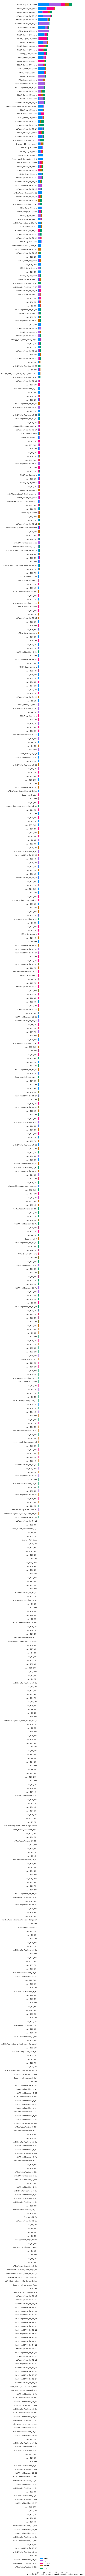

In [47]:
import shap
shap_values = shap.TreeExplainer(xgb_model).shap_values(x_test)
shap.summary_plot(shap_values, x_test,class_names= ["Fly", "Cow", "Human", "Mouse", "Worm"],max_display=780)

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
labeled_y_train = pd.DataFrame(labeled_y_train)
x_train, x_test, y_train, y_test = train_test_split(labeled_x_train, labeled_y_train, test_size=0.2)

# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train[0])
y_test = le.transform(y_test[0])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

n_estimators = [1, 10, 30, 50, 70, 90, 100, 120, 140]
for i in n_estimators:
    xgb_model = xgb.XGBClassifier(n_estimators = i, max_depth = 3)
    xgb_model.fit(x_train, y_train)
    y_pred = xgb_model.predict(x_test)

    # Calculate accuracy
    y_true = y_test

    acc = accuracy_score(y_true, y_pred)
    print("estimators:",i,"Accuracy", acc)

estimators: 1 Accuracy 0.565593087195601
estimators: 10 Accuracy 0.6708562450903378
estimators: 30 Accuracy 0.7446975648075412
estimators: 50 Accuracy 0.7706205813040062
estimators: 70 Accuracy 0.7776904948939513
estimators: 90 Accuracy 0.7808326787117046
estimators: 100 Accuracy 0.788688138256088
estimators: 120 Accuracy 0.781618224666143
estimators: 140 Accuracy 0.786331500392773


In [20]:
# with no standartization
n_estimators = [1, 10, 30, 50, 70, 90, 100, 120, 140]
for i in n_estimators:
    clf2 = GridSearchCV(xgb_model, param_grid =
                        {'max_depth': [3],'n_estimators': [i]})
    clf2.fit(x_train, y_train)
    print("estimators:",i,"Accuracy", clf2.best_score_)

estimators: 1 Accuracy 0.5874263261296659
estimators: 10 Accuracy 0.6532416502946955
estimators: 30 Accuracy 0.7206286836935167
estimators: 50 Accuracy 0.7479371316306482
estimators: 70 Accuracy 0.7554027504911591
estimators: 90 Accuracy 0.7644400785854618
estimators: 100 Accuracy 0.7642436149312377
estimators: 120 Accuracy 0.7669941060903732
estimators: 140 Accuracy 0.768958742632613


Text(0, 0.5, 'Accuracy')

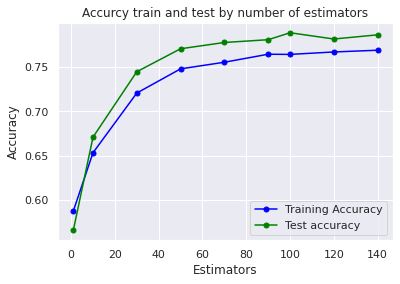

In [22]:
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Use learning curve to get training and test scores along with train sizes

# Calculate training and test mean and std
n_estimators = [1, 10, 30, 50, 70, 90, 100, 120, 140]
accuracy_train = [0.5874263261296659, 0.6532416502946955, 0.7206286836935167, 0.7479371316306482, 0.7554027504911591, 0.7644400785854618, 0.7642436149312377, 0.7669941060903732, 0.768958742632613]
accuracy_test = [0.565593087195601, 0.6708562450903378, 0.7446975648075412, 0.7706205813040062, 0.7776904948939513, 0.7808326787117046, 0.788688138256088, 0.781618224666143, 0.786331500392773]
train_mean = np.mean(np.array(accuracy_train))
train_std = np.std(np.array(accuracy_train))

sns.set_theme(style="darkgrid")
#Plot the learning curve
plt.plot(n_estimators, accuracy_train, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(n_estimators, accuracy_test, color='green', marker='o', markersize=5, label='Test accuracy')

plt.legend()
plt.title('Accurcy train and test by number of estimators')
plt.legend(loc='lower right')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

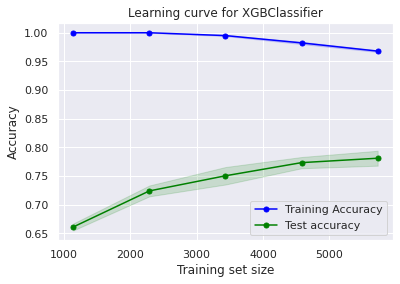

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# xgb_model = xgb.XGBClassifier(n_estimators = 100, max_depth = 3)

# # Use learning curve to get training and test scores along with train sizes
train_sizes, train_scores, test_scores = learning_curve(xgb_model, labeled_x_train, labeled_y_train, cv=10, train_sizes=np.linspace(0.2, 1.0, 5))
sns.set_theme(style="darkgrid")
# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
sns.set_theme(style="darkgrid")
#Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Test accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.legend()
plt.title('Learning curve for XGBClassifier')
plt.legend(loc='lower right')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')

In [ ]:
pred = pred + 1

In [178]:
sub = pd.read_csv("/kaggle/input/mirna-cross-species-prediction/sub.csv")
sub['label'] = pred
sub

,id,label
0,0,3
1,1,2
2,2,2
3,3,1
4,4,1
...,...,...
23200,23200,2
23201,23201,4
23202,23202,1
23203,23203,1


In [181]:
sub.to_csv('sub.csv', index=False)